# <center> Module1 </center>

<center> Presented by <strong>Yichen Shi, Yifan Li, Qizheng Ren</strong> </center>

# <center> Introduction with clear motivation and thesis statement</center>

<img src="../image/pic1.jpg" alt="Drawing" align="middle" style="width: 750px;height:500px;"/>

<img src="../image/pic2.jpg" alt="Drawing" align="middle" style="width: 660px;height:600px;"/>


In [2]:
library(tidyverse)
library(car)
bf_ori<-read.csv("../data/BodyFat.csv")
bf_ori = as.tibble(bf_ori)

<img src="../image/pic3.jpg" alt="Drawing" align="middle" style="width: 900px;height:500px;"/>

In [3]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

# <center> Outliers Detection</center>

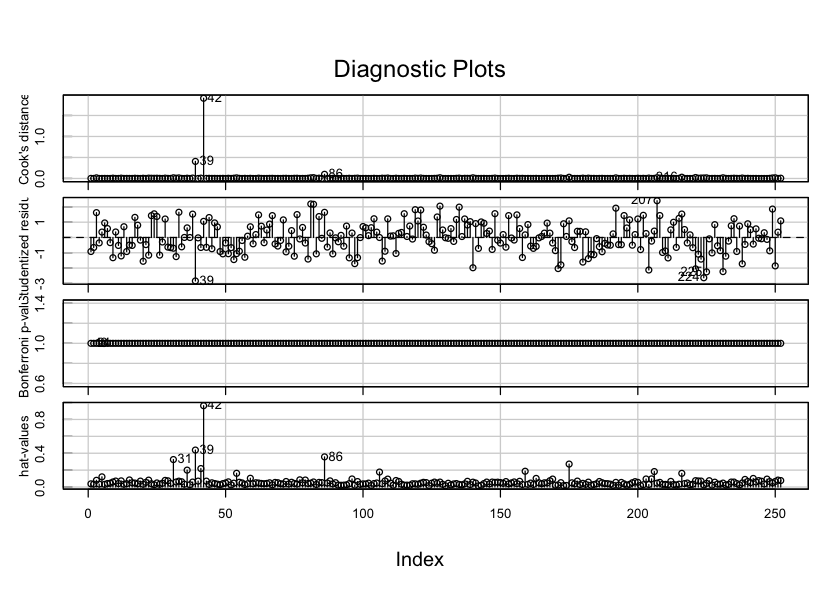

In [4]:

options(repr.plot.width=7, repr.plot.height=5)
bf<-bf_ori %>%
  select(-IDNO, -DENSITY)
model=lm(BODYFAT~.,data=bf)
influenceIndexPlot(model, id.n=4)

In [5]:
bf_df=as.data.frame(bf)
outliers=data.frame(
    "ID"=c(39,42,182),
    "Wrong_variable"=c("WEIGHT","HEIGHT","BODYFAT"),
    "Wrong_data"=c(bf_df[39,"WEIGHT"],bf_df[42,"HEIGHT"],bf_df[182,"BODYFAT"]),
    "min"=c(min(bf_df[,"WEIGHT"]),min(bf_df[,"HEIGHT"]),min(bf_df[,"BODYFAT"])),
    "25%"=c(quantile(bf_df[,"WEIGHT"],.25),quantile(bf_df[,"HEIGHT"],.25),quantile(bf_df[,"BODYFAT"],.25)),
    "mean"=c(mean(bf_df[,"WEIGHT"]),mean(bf_df[,"HEIGHT"]),mean(bf_df[,"BODYFAT"])),
    "75%"=c(quantile(bf_df[,"WEIGHT"],.75),quantile(bf_df[,"HEIGHT"],.75),quantile(bf_df[,"BODYFAT"],.75)),
    "max"=c(max(bf_df[,"WEIGHT"]),max(bf_df[,"HEIGHT"]),max(bf_df[,"BODYFAT"])))
print(outliers)

   ID Wrong_variable Wrong_data   min   X25.      mean   X75.    max
1  39         WEIGHT     363.15 118.5 159.00 178.92440 197.00 363.15
2  42         HEIGHT      29.50  29.5  68.25  70.14881  72.25  77.75
3 182        BODYFAT       0.00   0.0  12.80  18.93849  24.60  45.10


In [6]:
newbf<-bf[-c(39,42,182),]
set.seed(1111)
orders=sample(1:249)
newbf$group=rep(1,249)
newbf$group[orders[1:50]] = 1
newbf$group[orders[51:100]] = 2
newbf$group[orders[101:150]] = 3
newbf$group[orders[151:200]] = 4
newbf$group[orders[201:249]] = 5
write_csv(newbf,"newbodyfat2.csv")
path = "newbodyfat2.csv"
bf_ori = read.csv(path)
bf_ori = as.tibble(bf_ori)

# <center>Motivation for the model used and statement of the model</center>


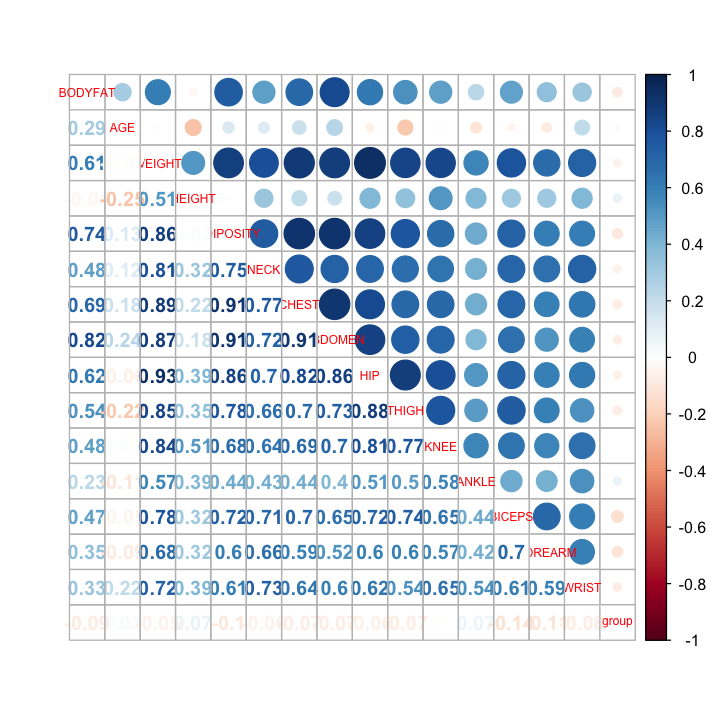

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
library(corrplot)
bf = bf_ori
corrplot.mixed(cor(bf),tl.cex=0.6)

From the correlaton plot above, we find that most of the predictors are highly correlated with body fat. Morever, there exists multilinearity between predictors. So we choose one variable with the highest covariance(ABDOMEN) to fit the linear model and through scatterplot below, we think it is reasonable.

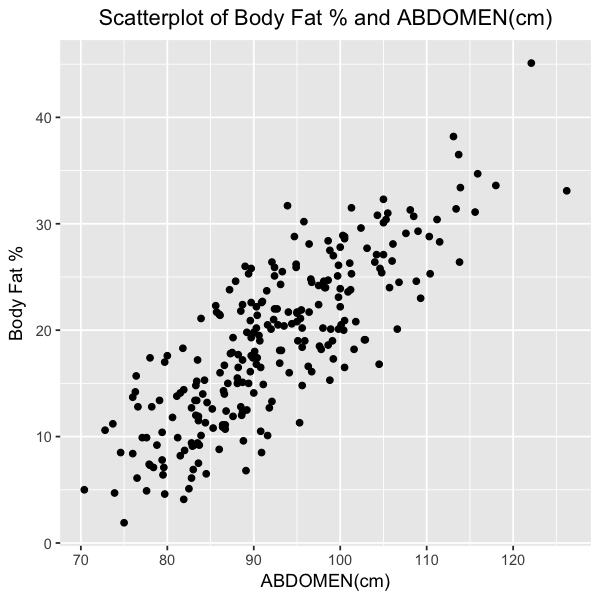

In [9]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(bf, aes(ABDOMEN, BODYFAT)) +
    geom_point()+
    labs(x="ABDOMEN(cm)",y="Body Fat %",
         title = "Scatterplot of Body Fat % and ABDOMEN(cm)")+
    theme(plot.title = element_text(hjust = 0.5))

# <center>Summary of final model and related coefficients</center>
Our final model is :
$$\text{Bodyfat}(\%)_i = \beta_0 + \beta_1*\text{Abdomen}_i(\text{cm}) + \epsilon_i,\ \epsilon_i\sim N(0, \sigma^2)$$

Here we include estimated coefficients,standard errors, R^2, p-values and confidence intervals.

## <center>Estimate</center>

In [10]:
bf = bf_ori
model1=lm(BODYFAT~ABDOMEN,data=bf)

print(as.data.frame(summary(model1)$coefficients))


               Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -37.9914133  2.5412430 -14.94993 2.003492e-36
ABDOMEN       0.6158889  0.0273459  22.52217 8.232401e-62


## <center> $R^2$</center>

In [11]:
model_information=c(summary(model1)$r.squared,
                    summary(model1)$adj.r.squared,
                    anova(model1)$'Pr(>F)'[1])%>%as.matrix()%>%t()
colnames(model_information)=c("R-square","Adj-R-square","p-value")
print((model_information))

      R-square Adj-R-square      p-value
[1,] 0.6725215    0.6711957 8.232401e-62


## <center>Confidence Interval</center>

In [12]:
print(confint(model1))

                 2.5 %      97.5 %
(Intercept) -42.996683 -32.9861436
ABDOMEN       0.562028   0.6697498


# <center>Laymen’s interpretation </center>
$$\text{Bodyfat}(\%) = -38 + 0.62*\text{Abdomen}(\text{cm})$$

For example, we take one of our teammate's abdomen data, which is 85cm (measured by me). So his predicted bodyfat is 14.7% while real number is 16%(According to him). Our model is a good guess for bodyfat.

# <center>Check Assumption</center> 
1. It's a linear model.(Obviously from correlation Plot)
2. Residuals seems follow normality from QQ-Plot. 
3. Variance is not constant.(From residual VS fitted Plot)
4. There exists some patterns between residuals and variables.(Independence)

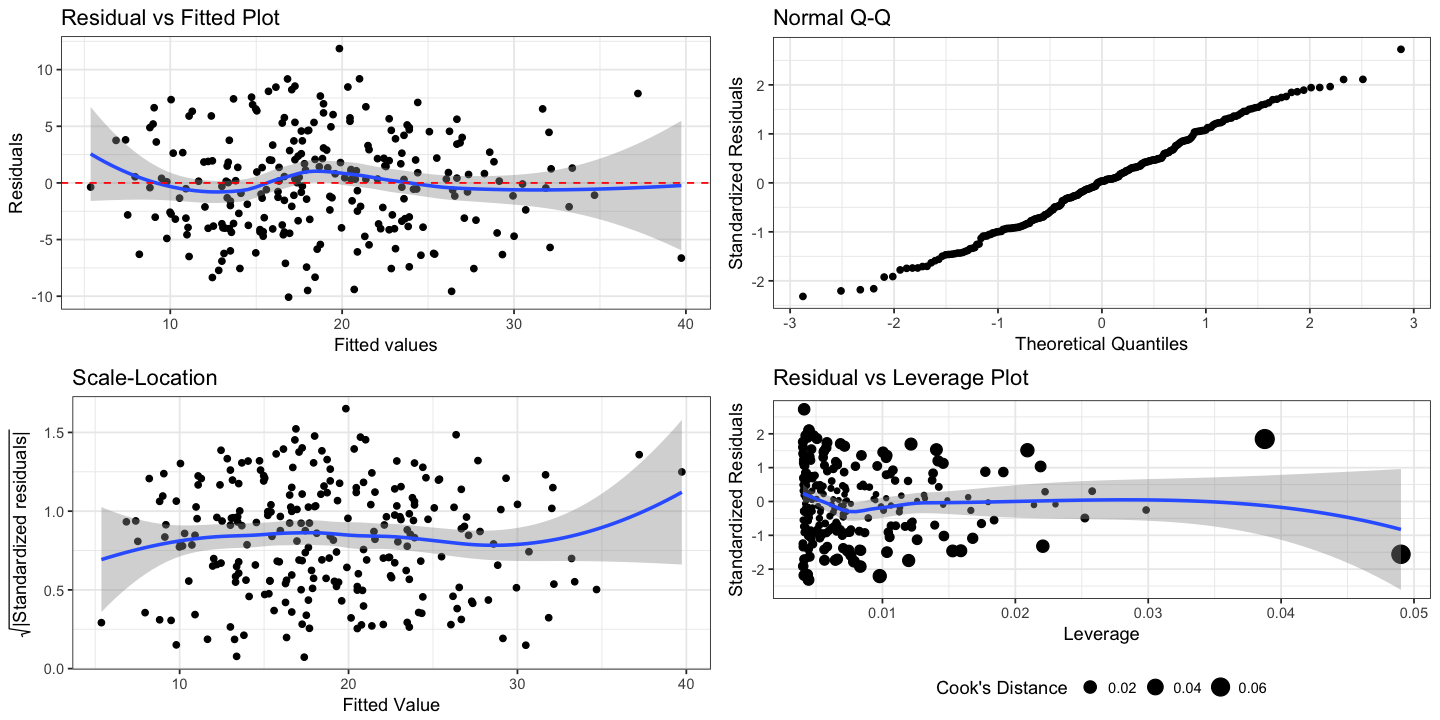

In [15]:
options(repr.plot.width=12, repr.plot.height=6)
source("../code/diagPlot.R")
plot_total = diagPlot(model1)
grid.arrange(plot_total[[1]], plot_total[[2]], plot_total[[3]],
             plot_total[[5]], ncol=2)

Info | Final model |P-value | AIC| BIC|CP|PLS|PLS2|NN|DT
------------ | -------------| ------------- |-------------  | ------| ------| -------------| -------------| -------------| -------------
Variable |1      | 3    | 8    | 5    | 5    | 14(3) | 13(3) | 14| 1
CV             | 18.993 | 16.310| 15.787| 15.954| 15.734| 17.321 | 17.100 | $\approx 16.4$| 18.993
R square                  |0.673   | 0.726 | 0.743 | 0.735 | 0.737 | 0.712 | 0.715 | -| 0.673

# Strength
1. Use only one variable.
2. Easy,Scalable,Robust.
3. R_square is acceptable.
4. Cross_Validation is acceptable.

# Weakness 
1. R_square is a bit smaller.
2. Cross_Validation is relatively larger.

# <center>Conclusion</center>
To sum up, although some of the assumptions(homoscedasticity and independency) may be violated, which may cause our preditions not so precise as others. Predictions of this model are acceptable and extremely easy, scalable, robust to use.